# KNN Classification

Given a set of features for an event, it is often useful from the machine learning perspective to see how predictive these features can be for a given label by applying some machine learning model to the features. For TCRSeq data, we may have class labels either at the sequence of sample/repertoire level. For example, in the case of sorted antigen-specific cells, the class label would be the antigen that we sorted on. In this case, we may want to know given these learned features, how well can we predict the antigen-specificity. In the case of TCRSeq data taken from tumors, our class label may be whether repertoire came from a patient that had received immunotherapy or not. In this instance, we may want to know whether we could predict on new samples whether they had recieved immunotheerapy based on the repertoire data. 

In order to assess the predictive power of these learned feaures in the unsupervised setting, we have provided a K-nearest neighbor algorithm for both sequences and samples that quantifies the predictive power of these learned features to predict both the sequence and sample label.

## Sequence Classification

First, we wiill load data from the murine antigen dataset and train the VAE.

In [1]:
%%capture
import sys
sys.path.append('../../')
from DeepTCR.DeepTCR import DeepTCR_U

# Instantiate training object
DTCRU = DeepTCR_U('Tutorial')

#Load Data from directories
DTCRU.Get_Data(directory='../../Data/Murine_Antigens',Load_Prev_Data=False,aggregate_by_aa=True,
               aa_column_beta=0,count_column=1,v_beta_column=2,j_beta_column=3)

#Train VAE
DTCRU.Train_VAE(Load_Prev_Data=False)

We can then call the KNN_Sequence_Classifier method.We will ask the method to compute the AUC's for all antigens in the dataset and visualize the results for us by class.

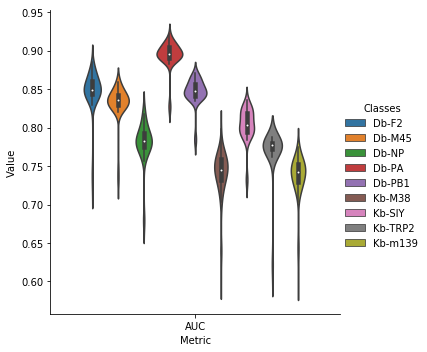

In [2]:
DTCRU.KNN_Sequence_Classifier(metrics=['AUC'],plot_metrics=True,by_class=True)

In this way, we can quantify how predictive thse learned features are for the antigen-specific label.

We can also view other metrics including Recall,Precision,and F1 Score.

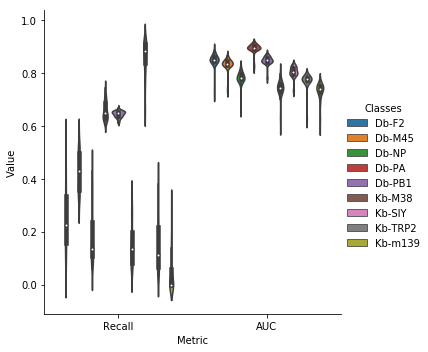

In [3]:
DTCRU.KNN_Sequence_Classifier(metrics=['AUC','Recall'],plot_metrics=True,by_class=True)

We can also change the plot type from the vareity of options for seaborn's catplot function.

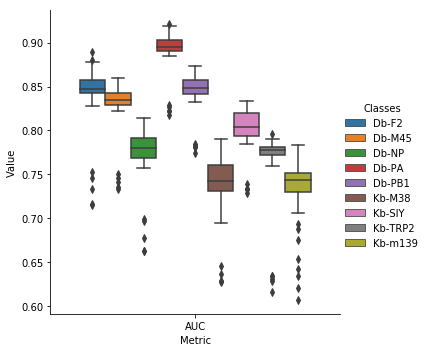

In [4]:
DTCRU.KNN_Sequence_Classifier(metrics=['AUC'],plot_metrics=True,by_class=True,plot_type='box')

## Repertoire/Sample Classification

For this example, we will pull data from the Rudqvist dataset, where we have TCRSeq data taken from mice who received different forms of therapy for their tumors (Control,RT,9H10,Combo). We want to ask if their composition of their repertoire is predictive of the therapy they received. In other words, we want to understand if the therapy has a predictable effect on the TCR Repertoire within their tumors. The way this algorithm works is that it begins by clustering all the sequences in all the samples. It then measusre the proportion of each sample in every cluster. This provides a vector of cluster proportions that sums to 1. we then can use a k-nearest neighbors approach to see how predictive this proportional composition to the therapy the mouse received. One key parameter here that can be changed is the distance metric to use that measures how far two repertoires are from each other. The options for this include KL-Divergence, Euclidean, JS-Divergence, Wasstersein Distance, and Correlation Distance. We recommend trying all methods as the optimal metric maybe experiment specific.

In [9]:
%%capture
import sys
sys.path.append('../../')
from DeepTCR.DeepTCR import DeepTCR_U

# Instantiate training object
DTCRU = DeepTCR_U('Tutorial')

#Load Data from directories
DTCRU.Get_Data(directory='../../Data/Rudqvist',Load_Prev_Data=False,aggregate_by_aa=True,
               aa_column_beta=1,count_column=2,v_beta_column=7,d_beta_column=14,j_beta_column=21)

#Train VAE
DTCRU.Train_VAE(Load_Prev_Data=False,accuracy_min=0.9)

We then can call the KNN command for samples in the same way as for the sequence classifier.

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 47.03325009346008 seconds
Jaccard graph constructed in 13.488406896591187 seconds
Wrote graph to binary file in 2.01224684715271 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.990905
Louvain completed 21 runs in 7.300062417984009 seconds
PhenoGraph complete in 69.90300464630127 seconds
Clustering Done


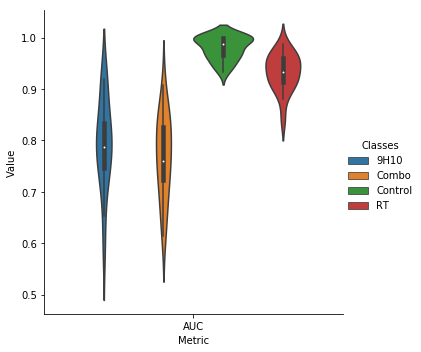

In [10]:
DTCRU.KNN_Repertoire_Classifier(metrics=['AUC'],distance_metric='KL',plot_metrics=True,by_class=True)

Since the first step of this algorithm is running the Phenograph clustering algorithm, we can rerun this line again and change the Load_Prev_Data parameter to True to avoid recomputing the clustering assigments. wE can also change the distance metric as shown.

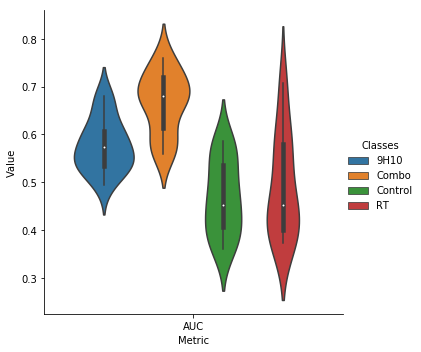

In [11]:
DTCRU.KNN_Repertoire_Classifier(metrics=['AUC'],distance_metric='wasserstein',plot_metrics=True,by_class=True,Load_Prev_Data=True)

We note that the KL divergence is a better distance metric in this particular dataset for predicting the therapy the mouse received from the TCR repertoire.

Also, in the case of very large files, we can downsample the clustering step and then use a K-nearest neighbor algorithm to assign the rest of the sequences. This is useful fo improve the speed of the algorithm.

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.4857609272003174 seconds
Jaccard graph constructed in 0.5389113426208496 seconds
Wrote graph to binary file in 0.048542022705078125 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.729993
After 19 runs, maximum modularity is Q = 0.731657
Louvain completed 39 runs in 4.984260082244873 seconds
PhenoGraph complete in 6.068241596221924 seconds
Clustering Done


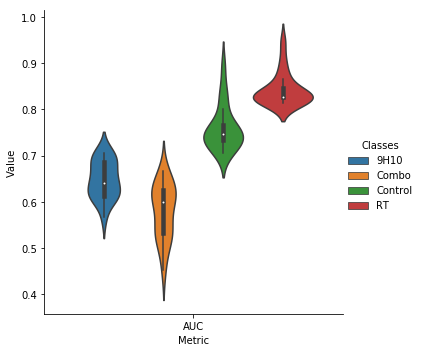

In [12]:
DTCRU.KNN_Repertoire_Classifier(metrics=['AUC'],distance_metric='KL',plot_metrics=True,by_class=True,sample=1000)

Of note, this down-sampling has resulted in loss of predictive power in this setting.

In conclusion, both of these methods can help one assess the predictive power of the TCR repertoire at both the sequence and sample level in order to identify whether there are structural signatures that are tied to certain class labels.